In [1]:
import scispacy
import spacy
import en_core_sci_sm
from spacy import displacy
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

In [2]:
# pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [2]:
nlp = spacy.load("/home/isha/en_ner_craft_md-0.2.4/en_ner_craft_md/en_ner_craft_md-0.2.4")
text = """Background: Since APOE alleles represent the most impactful genetic risk factors for Alzheimer's disease (AD), their differential mechanism(s) of action are under intense scrutiny. APOE4 is robustly associated with increased AD risk compared to the neutral APOE3 and protective APOE2. APOE alleles have also been associated with differential inflammation and gastrointestinal recovery after insult in human and murine studies, leading us to hypothesize that APOE alleles impact the gut microbiome.
Methods: To assess this hypothesis, we compared 16S ribosomal RNA gene amplicon-based microbiome profiles in a cohort of mice that were homozygous for APOE2, APOE3, or APOE4, and included both males and females as well as carriers and non-carriers of five familial AD (5xFAD) mutations. Fecal samples were analyzed from mice at 4 and 6 months of age. APOE genotype, as well as sex and 5xFAD status, was then tested for influence on alpha diversity (Shannon H index) and beta diversity (principal coordinate analyses and PERMANOVA). A Random Forest analysis was used to identify features that predicted APOE, sex and 5xFAD status.
Results: The richness and evenness (alpha diversity) of the fecal microbiome was not robustly associated with APOE genotype, 5xFAD status or sex. In contrast, microbial community composition (beta-diversity) was consistently and strongly associated with APOE genotype. The association between beta-diversity and sex or 5xFAD status was less consistent and more modest. Comparison of the differences underlying APOE effects showed that the relative abundance of multiple bacterial taxa was significantly different as a function of APOE genotype.
Conclusions: The structure of the gut microbiome was strongly and significantly associated with APOE alleles in this murine model. Further evaluation of these findings in humans, as well as studies evaluating the impact of the APOE-associated microbiota on AD-relevant phenotypes in murine models, will be necessary to determine if alterations in the gut microbiome represent a novel mechanism whereby APOE genotype impacts AD."""
doc = nlp(text)

In [3]:
print(list(doc.sents))

[Background: Since APOE alleles represent the most impactful genetic risk factors for Alzheimer's disease (AD), their differential mechanism(s) of action are under intense scrutiny., APOE4 is robustly associated with increased AD risk compared to the neutral APOE3 and protective APOE2., APOE alleles have also been associated with differential inflammation and gastrointestinal recovery after insult in human and murine studies, leading us to hypothesize that APOE alleles impact the gut microbiome.
, Methods: To assess this hypothesis, we compared 16S ribosomal RNA gene amplicon-based microbiome profiles in a cohort of mice that were homozygous for APOE2, APOE3, or APOE4, and included both males and females as well as carriers and non-carriers of five familial AD (5xFAD) mutations., Fecal samples were analyzed from mice at 4 and 6 months of age., APOE genotype, as well as sex and 5xFAD status, was then tested for influence on alpha diversity (Shannon H index) and beta diversity (principal

In [4]:
for tok in doc:
    print(tok.text,"...", tok.dep_)

Background ... ROOT
: ... punct
Since ... mark
APOE ... compound
alleles ... nsubj
represent ... advcl
the ... det
most ... advmod
impactful ... amod
genetic ... amod
risk ... compound
factors ... dobj
for ... case
Alzheimer ... cc:preconj
's ... case
disease ... nmod
( ... punct
AD ... appos
) ... punct
, ... punct
their ... cc:preconj
differential ... amod
mechanism(s ... nsubj
) ... punct
of ... case
action ... nmod
are ... predet
under ... case
intense ... amod
scrutiny ... agent
. ... punct
APOE4 ... nsubjpass
is ... auxpass
robustly ... advmod
associated ... ROOT
with ... case
increased ... amod
AD ... compound
risk ... nmod
compared ... case
to ... case
the ... det
neutral ... amod
APOE3 ... advcl
and ... cc
protective ... amod
APOE2 ... conj
. ... punct
APOE ... compound
alleles ... nsubjpass
have ... aux
also ... advmod
been ... auxpass
associated ... ROOT
with ... case
differential ... amod
inflammation ... nmod
and ... cc
gastrointestinal ... amod
recovery ... conj
after ...

In [5]:
import re
import pandas as pd
import bs4
import requests



from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [11]:
# import nltk
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/isha/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
filename='/home/isha/Downloads/pubmed_articles.txt'
file=open(filename, 'rt')
txt=file.read()
file.close()
#split into sentences
from nltk import sent_tokenize
sentences= sent_tokenize(txt)
print(sentences[:10])

["Murine Gut Microbiome Association With APOE Alleles\nBackground: Since APOE alleles represent the most impactful genetic risk factors for Alzheimer's disease (AD), their differential mechanism(s) of action are under intense scrutiny.", 'APOE4 is robustly associated with increased AD risk compared to the neutral APOE3 and protective APOE2.', 'APOE alleles have also been associated with differential inflammation and gastrointestinal recovery after insult in human and murine studies, leading us to hypothesize that APOE alleles impact the gut microbiome.', 'Methods: To assess this hypothesis, we compared 16S ribosomal RNA gene amplicon-based microbiome profiles in a cohort of mice that were homozygous for APOE2, APOE3, or APOE4, and included both males and females as well as carriers and non-carriers of five familial AD (5xFAD) mutations.', 'Fecal samples were analyzed from mice at 4 and 6 months of age.', 'APOE genotype, as well as sex and 5xFAD status, was then tested for influence on 

In [7]:
# import pandas as pd
df= pd.DataFrame(sentences)

In [8]:
df.shape

(979, 1)

In [9]:
df.to_csv('output.csv', index= False)

In [10]:
candidate_sentences=pd.read_csv('output.csv')

In [11]:
candidate_sentences.shape

(979, 1)

In [12]:
candidate_sentences.columns=['sentence']

In [13]:
candidate_sentences['sentence'].sample(5)

862                            Probes were synthesized using a programmable microfluidic microarray platform (CustomArray, Inc.) and were prepared for padlock investigations, as described.
458                                                  Histone methyltransferases, or HMTs, are enzymes that methylate lysine or arginine residues on the histone tails of histones H3 and H4.
718                                                     Consequently, hypomethylation of these enhancers in neurons may underlie the overexpression of BACE1 involved in AD pathophysiology.
693               There were 626 regulatory regions exhibiting significant DNA methylation changes (q < 0.05, robust linear regression model and hypergeometric test; Supplementary Data 1).
739    Next, we integrated our epigenetic and transcriptomic dataset in a network analysis and found two major hubs converging on UBC and CUL3, which included APP as a subnetwork hub (Fig.
Name: sentence, dtype: object

In [14]:
doc= nlp("Next, we integrated our epigenetic and transcriptomic dataset in a network analysis and found two major hubs converging on UBC and CUL3, which included APP as a subnetwork hub")

In [15]:
for tok in doc:
    print(tok.text,"...",tok.dep_)

Next ... advmod
, ... punct
we ... nsubj
integrated ... ROOT
our ... cc:preconj
epigenetic ... amod
and ... cc
transcriptomic ... conj
dataset ... dobj
in ... case
a ... det
network ... compound
analysis ... nmod
and ... cc
found ... conj
two ... nummod
major ... amod
hubs ... dobj
converging ... acl
on ... case
UBC ... nmod
and ... cc
CUL3 ... conj
, ... punct
which ... nsubj
included ... parataxis
APP ... dobj
as ... case
a ... det
subnetwork ... compound
hub ... nmod


In [16]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]


In [17]:
entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
  entity_pairs.append(get_entities(i))

100%|██████████| 979/979 [00:09<00:00, 100.46it/s]


In [18]:
entity_pairs[10:20]

[['relative APOE abundance', 'differences APOE effects'],
 ['structure', ''],
 ['models  alterations', 'novel gut mechanism'],
 ['strongly AD APOE2', 'AD risk'],
 ['apoE alleles', 'AD risk'],
 ['', 'apoE alleles apoE insights'],
 ['Several  reports', 'relationship'],
 ['APOE-deficient  mice', 'microbiome differences'],
 ['insult APOE4 mice', 'genotype-dependent  differences'],
 ['humans gut APOE4', '']]

In [19]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [20]:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

100%|██████████| 979/979 [00:14<00:00, 69.50it/s] 


In [21]:
pd.Series(relations).value_counts()[:50]

used            36
found           35
associated      32
shown           20
identified      18
performed       17
observed        16
is              15
examined        12
included        11
showed          10
confirmed        9
demonstrated     8
reported         8
were             7
evaluated        7
determined       7
generated        7
contribute       6
analyzed         6
considered       6
are              6
revealed         6
obtained         5
suggested        5
had              5
Fig.             5
was              5
supports         5
correlated       5
compared         5
assessed         5
significant      5
demonstrates     5
have             4
derived          4
Using            4
involved         4
designed         4
suggest          4
linked           4
has              4
reduced          4
promising        4
examine          4
confirm          4
known            3
7                3
extracted        3
shows            3
dtype: int64

In [22]:
source= [i[0] for i in entity_pairs]
target= [i[1] for i in entity_pairs]
kg_df= pd.DataFrame({'source': source, 'target': target, 'edge': relations})

In [48]:
# !pip install networkx

You should consider upgrading via the 'pip install --upgrade pip' command.


In [49]:
# !pip install --upgrade networkx

     |████████████████████████████████| 1.6MB 1.2MB/s eta 0:00:01
  Found existing installation: decorator 4.0.11
    Uninstalling decorator-4.0.11:
      Successfully uninstalled decorator-4.0.11
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11
You should consider upgrading via the 'pip install --upgrade pip' command.


In [23]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

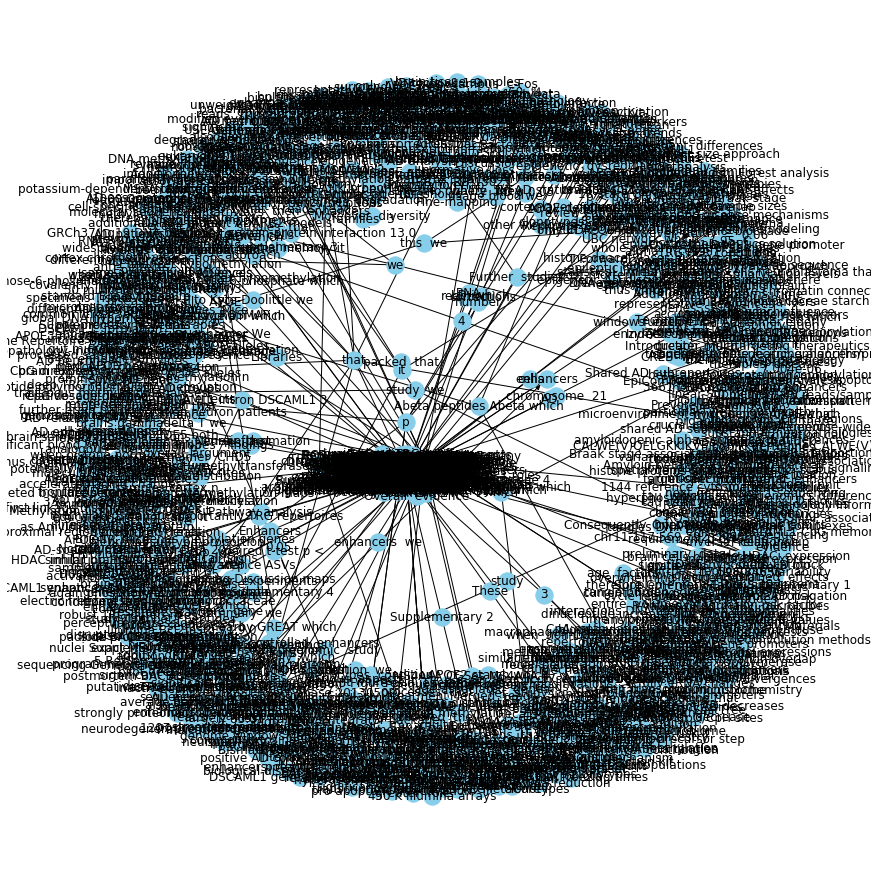

In [24]:
plt.figure(figsize=(12,12))

pos= nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue',edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

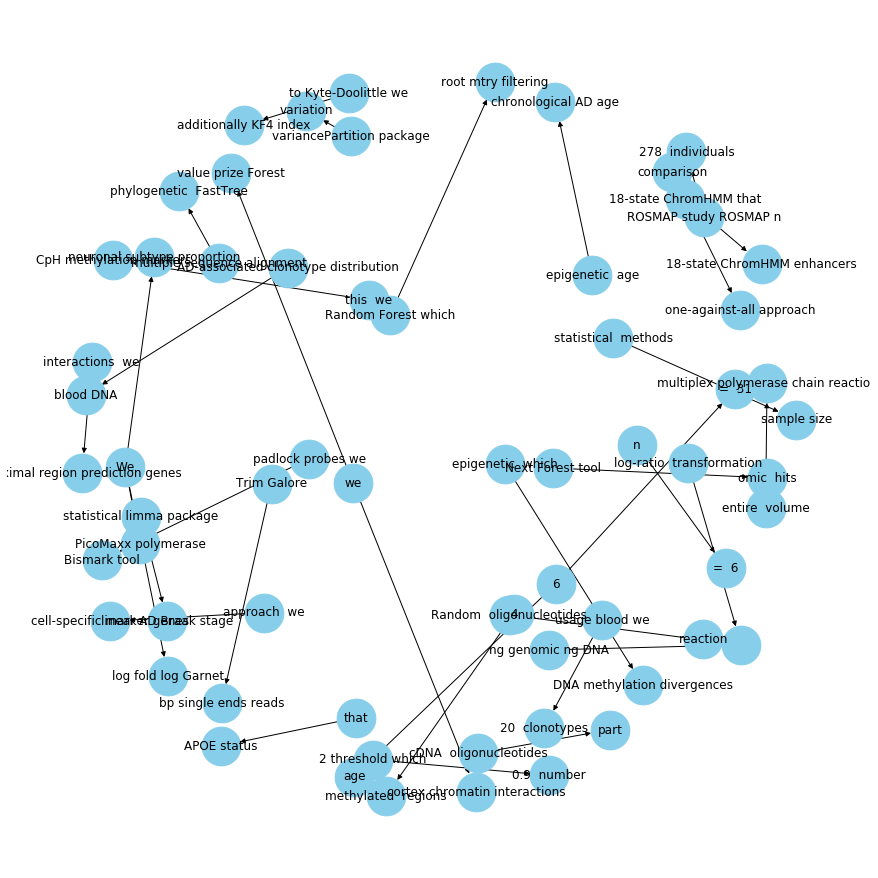

In [26]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="used"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

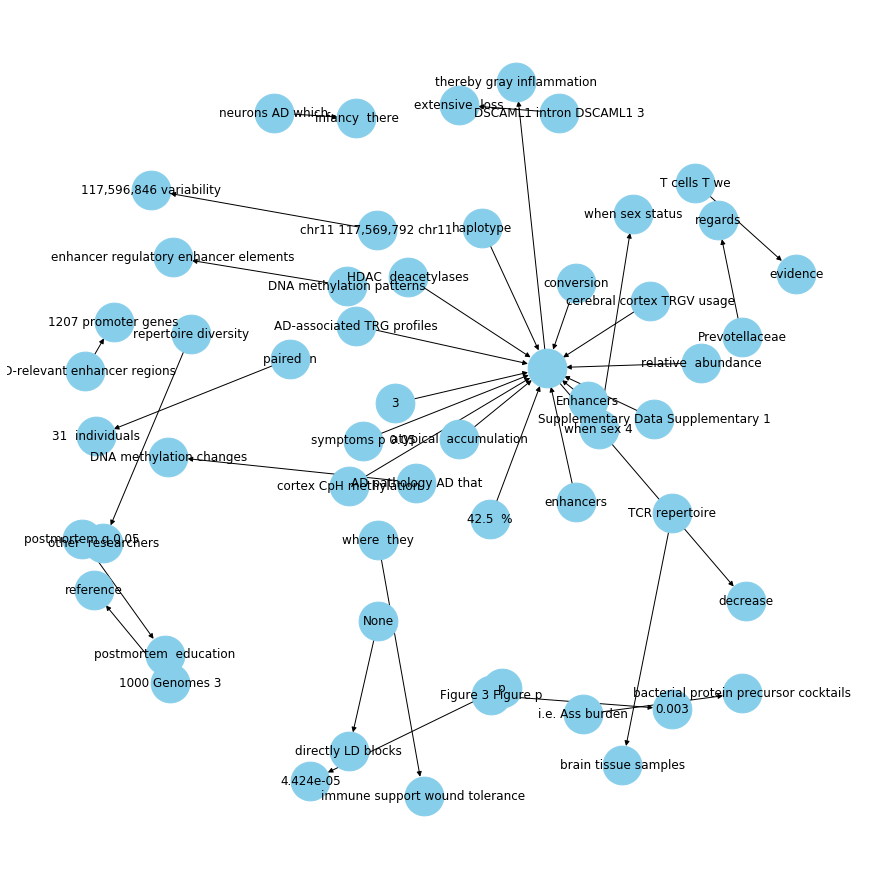

In [28]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="found"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()